<a href="https://colab.research.google.com/github/RoseJaisil/Kaggle_competitions/blob/main/Kaggle_Project_Hacking_the_Human_Vasculature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Dataset from Kaggle

In [ ]:
!pip install -q kaggle

In [13]:
!pip install imagecodecs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 36.3 MB/s eta 0:00:00


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cvformedicalimages","key":"c53372d7356dcbba00a2cb57004ba9bf"}'}

In [8]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c hubmap-hacking-the-human-vasculature

 99% 3.94G/3.97G [00:32<00:00, 129MB/s]
100% 3.97G/3.97G [00:32<00:00, 131MB/s]


In [ ]:
!unzip hubmap-hacking-the-human-vasculature.zip -d dataset

Explore Dataset

In [5]:
from skimage.io import imread,imsave,imshow
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import json
import imagecodecs
%matplotlib inline

In [2]:
with open("/content/dataset/polygons.jsonl") as f:
  data = f.read()
res = []
for file in data.splitlines():
  d = json.loads(file)
  res.append(d)

In [3]:
def get_cat_coordinates(coordinates):
  coords_array = np.array(coordinates).squeeze()
  xs = coords_array[:, 0]
  ys = coords_array[:, 1]

  return xs, ys


##### Let's view one image

In [4]:
d = res[500]
image_id = d["id"]
path = f"/content/dataset/train/{image_id}.tif"
img = imread(path)

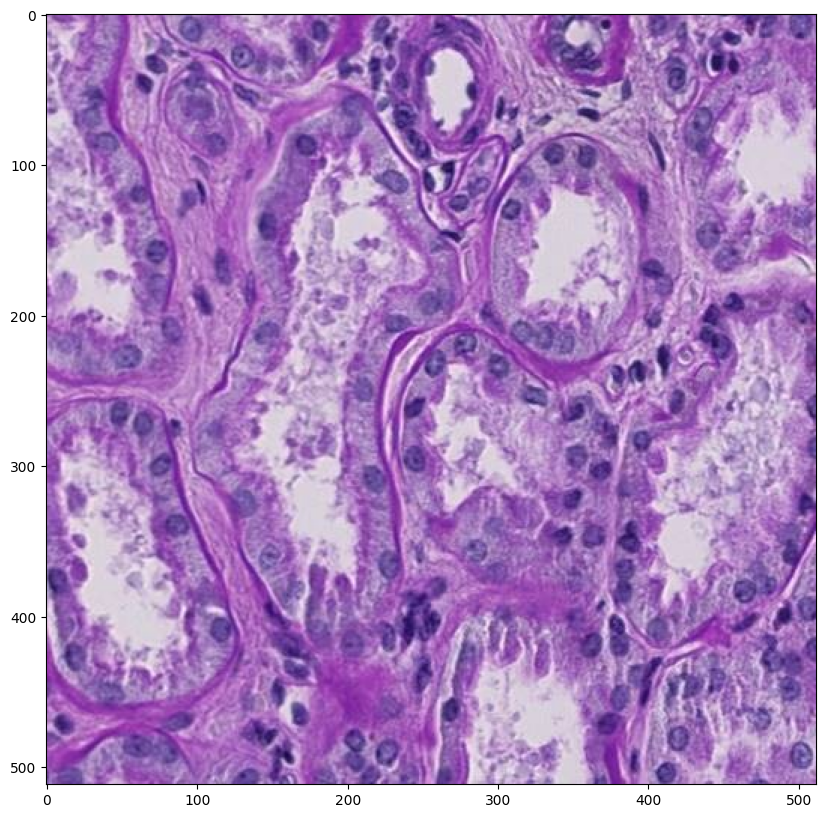

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.imshow(img)
fig.show()

#### Visualize using the annotations

Ref: https://www.kaggle.com/code/yassinealouini/kidney-vascular-eda